<a href="https://colab.research.google.com/github/kaleian/experiment-1/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

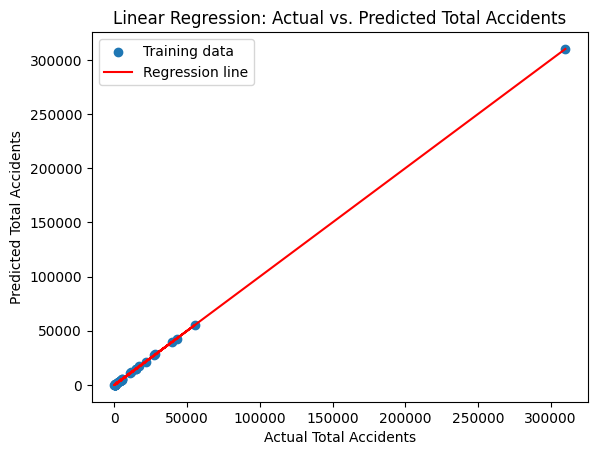

Slope: 14423.000000000004
Intercept: 168.00000000000728
Correlation coefficient: 1.0
The number of accidents is positively correlated with the predictor variable.
The correlation between the number of accidents and the predictor variable is strong.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the data
df = pd.read_csv("./roadaccidents.csv")

# Handle NaN values in the "Total Accidents" column by filling with mean
df["Total Accidents"].fillna(df["Total Accidents"].mean(), inplace=True)

# Perform one-hot encoding on the "State" column
X = pd.get_dummies(df["State"], drop_first=True)  # drop_first=True to avoid multicollinearity
y = df["Total Accidents"]

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Make predictions on the training data
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(y, y_pred, label="Training data")
plt.plot(y, y, color="red", label="Regression line")

# Add labels and title
plt.xlabel("Actual Total Accidents")
plt.ylabel("Predicted Total Accidents")
plt.title("Linear Regression: Actual vs. Predicted Total Accidents")

# Add legend
plt.legend()

# Show the plot
plt.show()

# Get insights from the plot
slope = model.coef_[0]
intercept = model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

# Calculate the correlation coefficient between the actual and predicted values
correlation = df["Total Accidents"].corr(pd.Series(y_pred))

print("Correlation coefficient:", correlation)

# Interpret the results
if slope > 0:
    print("The number of accidents is positively correlated with the predictor variable.")
elif slope < 0:
    print("The number of accidents is negatively correlated with the predictor variable.")
else:
    print("There is no correlation between the number of accidents and the predictor variable.")

if correlation > 0.7:
    print("The correlation between the number of accidents and the predictor variable is strong.")
elif correlation > 0.3:
    print("The correlation between the number of accidents and the predictor variable is moderate.")
elif correlation > 0:
    print("The correlation between the number of accidents and the predictor variable is weak.")
else:
    print("There is no correlation between the number of accidents and the predictor variable.")
